Name: **Amrit Parimi**
UNI: **ap4142**

##Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [303]:

a,b = np.random.rand(20),np.random.rand(20)
x_train = [[a[i],b[i]] for i in range(20)]
y_train = []
for i in range(20):
    if(x_train[i][0]>x_train[i][1]):
        y_train.append(1.0)
    else:
        y_train.append(-1.0)



In [279]:
a,b = np.random.rand(1000),np.random.rand(1000)
x_test = [[a[i],b[i]] for i in range(1000)]
y_test = []
for i in range(1000):
    if(x_test[i][0]>x_test[i][1]):
        y_test.append(1.0)
    else:
        y_test.append(-1.0)

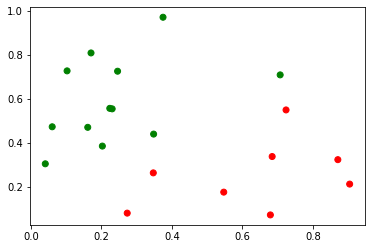

In [304]:
def predict(w,x):
    return 1.0 if w[0]*x[0]+w[1]*x[1]>=0 else -1.0

def percept_train(x_train, a, lr, epochs):
    w = [0,0]
    for ep in range(epochs):
        err = 0.0
        for i in range(len(x_train)):
            y_pred = predict(w,x_train[i])
            # error = max(0,a - y_train[i]*(w[0]*x_train[i][0]+w[1]*x_train[i][1]))
            # print(a - y_train[i]*(w[0]*x_train[i][0]+w[1]*x_train[i][1]))
            if(y_train[i]*(w[0]*x_train[i][0]+w[1]*x_train[i][1])<=a):
                w[0]+=lr*x_train[i][0]*y_train[i]
                w[1]+=lr*x_train[i][1]*y_train[i]
        # print('>epoch=%d, lrate=%.3f, error=%.3f' % (ep, lr, err))
    return w

plt.scatter([x_train[i][0] for i in range(20)],[x_train[i][1] for i in range(20)],color=['red' if y_train[i]==1 else 'green' for i in range(20)])
plt.show()

[0.06943906675610265, -0.09107289548530381]
0.902


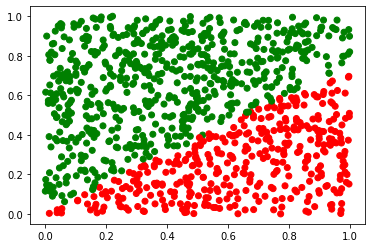

In [305]:
# 1.1
w = percept_train(x_train,0,0.1,50)
print(w)

acc = 0
y_pred = []
# print(predict(w,x_test[0]),w[0]*x_test[0][0]+w[1]*x_test[0][1])
for i in range(len(x_test)):
    y_pred.append(predict(w,x_test[i]))
    if(y_pred[-1]==y_test[i]):
        acc+=1
acc = acc/len(x_test)
print(acc)
plt.scatter([x_test[i][0] for i in range(1000)],[x_test[i][1] for i in range(1000)],color=['red' if y_pred[i]==1 else 'green' for i in range(1000)])
plt.show()

[7.061454974712272, -7.848020193905932]
0.955


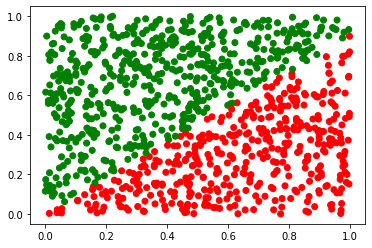

In [306]:
# 1.2
w = percept_train(x_train,1,0.1,200)
print(w)

acc = 0
y_pred = []
# print(predict(w,x_test[0]),w[0]*x_test[0][0]+w[1]*x_test[0][1])
for i in range(len(x_test)):
    y_pred.append(predict(w,x_test[i]))
    if(y_pred[-1]==y_test[i]):
        acc+=1
acc = acc/len(x_test)
print(acc)
plt.scatter([x_test[i][0] for i in range(1000)],[x_test[i][1] for i in range(1000)],color=['red' if y_pred[i]==1 else 'green' for i in range(1000)])
plt.show()

1.3 We can observe that we obtain better accuracy when we use hinge loss. We get better accuracy using hinge loss when compared to perceptron criterion because hinge loss handles points closer to the boundary and normally misclassified points better. Perceptron loss gives a non-zero gradient only when there is a misclassification but Hinge loss gives non-zero gradient for misclassified points as well as the points very close to the boundary $(y(w.x)<1)$ even though they are correctly classified. This makes the classifier learn and perform better as it has a more precise boundary. \\

1.4 The classification should not change significantly in the case of Hinge loss because hinge loss trains with points close to boundary along with misclassified points making it more stable. We would therefore expect it to learn better than the perceptron and thus the classification of the test points should not change significantly.

##Problem 2

Problem 2.1 \\
We typically train models with gradient descent using a loss function in terms of the weight. The derivative is then back-propagated to the previous layers of the model. The weight update of the previous layers is proportional to the gradient value at this layer. As we keep going towards the initial layers of a deep network, the value is exponentially proportional to te gradient value at this layer. As we use activation functions, in the process of back-propagation there is a chance for the value of the gradient to become 0 or very close to 0. Due to this the weight update of the previous layers is also affected as it is proportinal. \\
$\frac{d(tanh(x))}{dx}->0$ when x is either too high or too low. Similarly $\frac{d(sigmoid(x))}{dx}->0$ when x is either too high or too low. \\
Below are the violin plots showing that the activations are more dense at value=1,-1 for tanh and 0,1 for sigmoid  where the gradient is close to 0.

In [146]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras import backend as K
from tensorflow.keras import optimizers
import tensorflow as tf

from matplotlib import pyplot as plt
from matplotlib import rcParamsDefault


def grid_axes_it(n_plots, n_cols=3, enumerate=False, fig=None):
    """
    Iterate through Axes objects on a grid with n_cols columns and as many
    rows as needed to accommodate n_plots many plots.
    Args:
        n_plots: Number of plots to plot onto figure.
        n_cols: Number of columns to divide the figure into.
        fig: Optional figure reference.
    Yields:
        n_plots many Axes objects on a grid.
    """
    n_rows = n_plots / n_cols + int(n_plots % n_cols > 0)

    if not fig:
        default_figsize = rcParamsDefault['figure.figsize']
        fig = plt.figure(figsize=(
            default_figsize[0] * n_cols,
            default_figsize[1] * n_rows
        ))

    for i in range(1, n_plots + 1):
        ax = plt.subplot(n_rows, n_cols, i)
        yield ax


def create_mlp_model(
    n_hidden_layers,
    dim_layer,
    input_shape,
    n_classes,
    kernel_initializer,
    bias_initializer,
    activation,
):
    """Create Multi-Layer Perceptron with given parameters."""
    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='softmax', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    return model


def create_cnn_model(input_shape, num_classes, kernel_initializer='glorot_uniform',
                     bias_initializer='zeros'):
    """Create CNN model similar to
       https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py."""
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape,
                     kernel_initializer=kernel_initializer,
                     bias_initializer=bias_initializer))
    model.add(Conv2D(64, (3, 3), activation='relu',
                     kernel_initializer=kernel_initializer,
                     bias_initializer=bias_initializer))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu',
                    kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax',
                    kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    return model


def compile_model(model):
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optimizers.RMSprop(),
                  metrics=['accuracy'])
    return model


def get_init_id(init):
    """
    Returns string ID summarizing initialization scheme and its parameters.
    Args:
        init: Instance of some initializer from keras.initializers.
    """
    try:
        init_name = str(init).split('.')[2].split(' ')[0]
    except:
        init_name = str(init).split(' ')[0].replace('.', '_')

    param_list = []
    config = init.get_config()
    for k, v in config.items():
        if k == 'seed':
            continue
        param_list.append('{k}-{v}'.format(k=k, v=v))
    init_params = '__'.join(param_list)

    return '|'.join([init_name, init_params])


def get_activations(model, x, mode=0.0):
    """Extract activations with given model and input vector x."""
    outputs = [layer.output for layer in model.layers]
    activations = K.function([model.input], outputs)
    output_elts = activations(x)
    return output_elts


class LossHistory(keras.callbacks.Callback):
    """A custom keras callback for recording losses during network training."""

    def on_train_begin(self, logs={}):
        self.losses = []
        self.epoch_losses = []
        self.epoch_val_losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

    def on_epoch_end(self, epoch, logs={}):
        self.epoch_losses.append(logs.get('loss'))
        self.epoch_val_losses.append(logs.get('val_loss'))

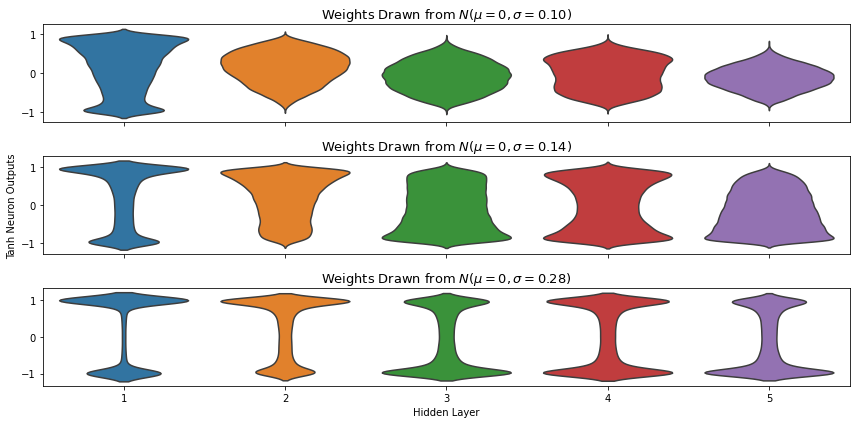

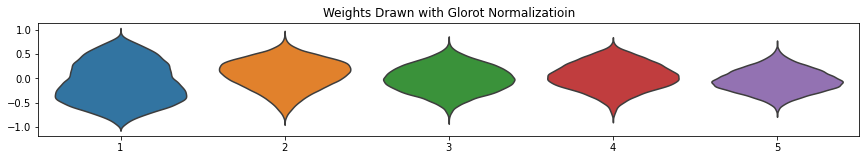

In [308]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
from tensorflow.keras import optimizers


seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28

x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.all_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.all_utils.to_categorical(y_test, num_classes)

# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
    activation = 'tanh'

    model = create_mlp_model(
        n_hidden_layers,
        dim_layer,
        (data_dim,),
        n_classes,
        init,
        'zeros',
        activation
    )
    compile_model(model)
    output_elts = get_activations(model, x_test)
    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))
axes = grid_axes_it(len(sigmas), 1, fig=fig)
for sig in sigmas:
    ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("Tanh Neuron Outputs")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")

plt.tight_layout()
plt.show()







seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28

x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.all_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.all_utils.to_categorical(y_test, num_classes)

# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
# sigmas = [0.10, 0.14, 0.28]
# for stddev in sigmas:
init = initializers.GlorotNormal(seed=seed)
activation = 'tanh'

model = create_mlp_model(
    n_hidden_layers,
    dim_layer,
    (data_dim,),
    n_classes,
    init,
    'zeros',
    activation
)
compile_model(model)
output_elts = get_activations(model, x_test)
n_layers = len(model.layers)
i_output_layer = n_layers - 1

for i, out in enumerate(output_elts[:-1]):
    if i > 0 and i != i_output_layer:
        for out_i in out.ravel()[::20]:
            rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))
axes = grid_axes_it(len(sigmas), 1, fig=fig)
# for sig in sigmas:
ax = next(axes)
ddf = df[df['Standard Deviation'] == sig]
sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Weights Drawn with Glorot Normalizatioin')

plt.tight_layout()
plt.show()

Above are the graphs showing how the activations in the initial are concentrated at value=1,-1 in other words, gradients are close to 0 proving gradient vanishing. \\
We can also observe that for higher standard deviations there is a higher chance of gradient vanishing. \\
We can also observe how using Glorot normalization has prevented the problem of vanishing gradient as the Tanh activations are well distributed.

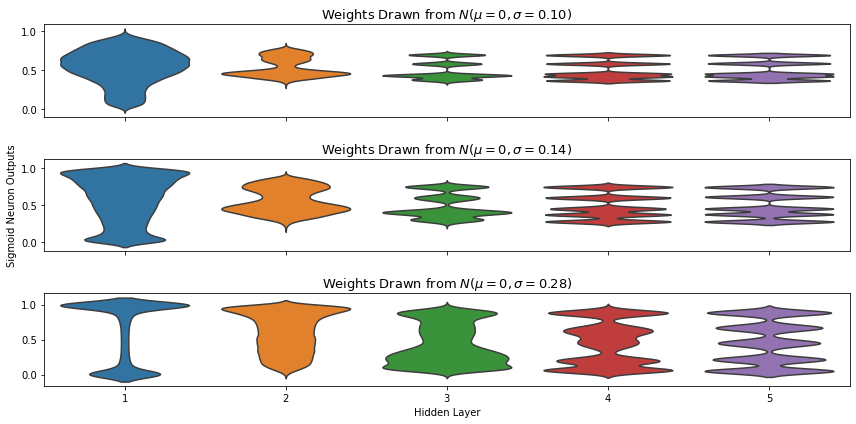

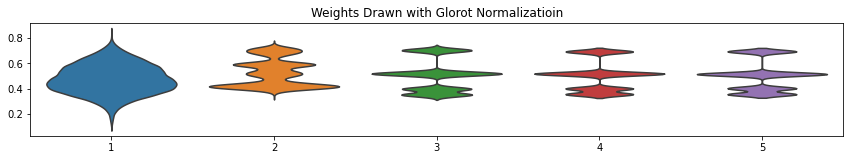

In [147]:
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
from tensorflow.keras import optimizers


seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28

x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.all_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.all_utils.to_categorical(y_test, num_classes)

# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
sigmas = [0.10, 0.14, 0.28]
for stddev in sigmas:
    init = initializers.RandomNormal(mean=0.0, stddev=stddev, seed=seed)
    activation = 'sigmoid'

    model = create_mlp_model(
        n_hidden_layers,
        dim_layer,
        (data_dim,),
        n_classes,
        init,
        'zeros',
        activation
    )
    compile_model(model)
    output_elts = get_activations(model, x_test)
    n_layers = len(model.layers)
    i_output_layer = n_layers - 1

    for i, out in enumerate(output_elts[:-1]):
        if i > 0 and i != i_output_layer:
            for out_i in out.ravel()[::20]:
                rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))
axes = grid_axes_it(len(sigmas), 1, fig=fig)
for sig in sigmas:
    ax = next(axes)
    ddf = df[df['Standard Deviation'] == sig]
    sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

    ax.set_xlabel('')
    ax.set_ylabel('')

    ax.set_title('Weights Drawn from $N(\mu = 0, \sigma = {%.2f})$' % sig, fontsize=13)

    if sig == sigmas[1]:
        ax.set_ylabel("Sigmoid Neuron Outputs")
    if sig != sigmas[-1]:
        ax.set_xticklabels(())
    else:
        ax.set_xlabel("Hidden Layer")

plt.tight_layout()
plt.show()





import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
from tensorflow.keras import optimizers


seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28

x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.all_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.all_utils.to_categorical(y_test, num_classes)

# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
# sigmas = [0.10, 0.14, 0.28]
# for stddev in sigmas:
init = initializers.GlorotNormal(seed=seed)
activation = 'sigmoid'

model = create_mlp_model(
    n_hidden_layers,
    dim_layer,
    (data_dim,),
    n_classes,
    init,
    'zeros',
    activation
)
compile_model(model)
output_elts = get_activations(model, x_test)
n_layers = len(model.layers)
i_output_layer = n_layers - 1

for i, out in enumerate(output_elts[:-1]):
    if i > 0 and i != i_output_layer:
        for out_i in out.ravel()[::20]:
            rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))
axes = grid_axes_it(len(sigmas), 1, fig=fig)
# for sig in sigmas:
ax = next(axes)
ddf = df[df['Standard Deviation'] == sig]
sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Weights Drawn with Glorot Normalizatioin')

plt.tight_layout()
plt.show()

Above are the graphs showing how the activations in the initial layers with are concentrated at value=1,0 in other words, gradients close to 0 when we use high standard deviation. \\
We can also observe that for higher standard deviations there is a higher chance of gradient vanishing. \\
We can also observe how using Glorot normalization has prevented the problem of vanishing gradient as the Sigmoid activations are well distributed.

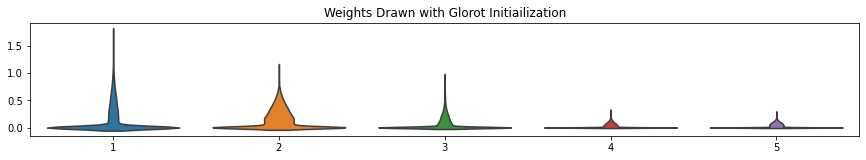

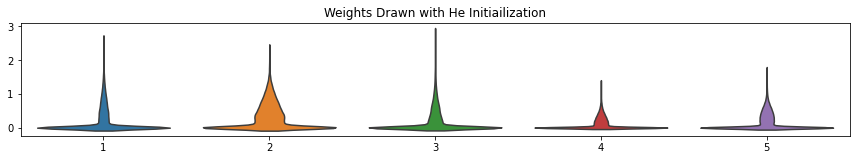

In [310]:

import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
from tensorflow.keras import optimizers


seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28

x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.all_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.all_utils.to_categorical(y_test, num_classes)

# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
# sigmas = [0.10, 0.14, 0.28]
# for stddev in sigmas:
init = initializers.GlorotNormal(seed=seed)
activation = 'relu'

model = create_mlp_model(
    n_hidden_layers,
    dim_layer,
    (data_dim,),
    n_classes,
    init,
    'zeros',
    activation
)
compile_model(model)
output_elts = get_activations(model, x_test)
n_layers = len(model.layers)
i_output_layer = n_layers - 1

for i, out in enumerate(output_elts[:-1]):
    if i > 0 and i != i_output_layer:
        for out_i in out.ravel()[::20]:
            rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))
axes = grid_axes_it(len(sigmas), 1, fig=fig)
# for sig in sigmas:
ax = next(axes)
ddf = df[df['Standard Deviation'] == sig]
sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Weights Drawn with Glorot Initiailization')

plt.tight_layout()
plt.show()







import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras import initializers
from keras.datasets import mnist
from tensorflow.keras import optimizers


seed = 10

# Number of points to plot
n_train = 1000
n_test = 100
n_classes = 10

# Network params
n_hidden_layers = 5
dim_layer = 100
batch_size = n_train
epochs = 1

# Load and prepare MNIST dataset.
n_train = 60000
n_test = 10000

(x_train, y_train), (x_test, y_test) = mnist.load_data()
num_classes = len(np.unique(y_test))
data_dim = 28 * 28

x_train = x_train.reshape(60000, 784).astype('float32')[:n_train]
x_test = x_test.reshape(10000, 784).astype('float32')[:n_train]
x_train /= 255
x_test /= 255

y_train = keras.utils.all_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.all_utils.to_categorical(y_test, num_classes)

# Run the data through a few MLP models and save the activations from
# each layer into a Pandas DataFrame.
rows = []
# sigmas = [0.10, 0.14, 0.28]
# for stddev in sigmas:
init = initializers.HeNormal(seed=seed)
activation = 'relu'

model = create_mlp_model(
    n_hidden_layers,
    dim_layer,
    (data_dim,),
    n_classes,
    init,
    'zeros',
    activation
)
compile_model(model)
output_elts = get_activations(model, x_test)
n_layers = len(model.layers)
i_output_layer = n_layers - 1

for i, out in enumerate(output_elts[:-1]):
    if i > 0 and i != i_output_layer:
        for out_i in out.ravel()[::20]:
            rows.append([i, stddev, out_i])

df = pd.DataFrame(rows, columns=['Hidden Layer', 'Standard Deviation', 'Output'])

# Plot previously saved activations from the 5 hidden layers
# using different initialization schemes.
fig = plt.figure(figsize=(12, 6))
axes = grid_axes_it(len(sigmas), 1, fig=fig)
# for sig in sigmas:
ax = next(axes)
ddf = df[df['Standard Deviation'] == sig]
sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Weights Drawn with He Initiailization')

plt.tight_layout()
plt.show()

From the violin plot above, we can observe that the distribution of the activations of the 4th and 5th layers are concentrated at a very small value(<0.5) in the case of Xavier/Glorot initialization(may cause vanishing gradients) when compared to He initialization. Therefore He Initialization works better for ReLU activation.

Problem 2.2

In [148]:
def create_mlp_model(
    n_hidden_layers,
    dim_layer,
    input_shape,
    n_classes,
    kernel_initializer,
    bias_initializer,
    activation,
):
    """Create Multi-Layer Perceptron with given parameters."""
    model = Sequential()
    model.add(Dense(dim_layer, input_shape=input_shape, kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    for i in range(n_hidden_layers):
        model.add(Dense(dim_layer, activation=activation, kernel_initializer=kernel_initializer,
                        bias_initializer=bias_initializer))
    model.add(Dense(n_classes, activation='linear', kernel_initializer=kernel_initializer,
                    bias_initializer=bias_initializer))
    return model

1.1 The function I used show the phenomenon of dead ReLU network is $f(x) = |x|$. \\
I have classified a network as a dying ReLU network using the fact that it gives the same answer as output irrespective of the input(test set).

In [329]:
minibatch = 64
runs=1000
c=0
for _ in range(runs):
    x_train = np.random.uniform(-np.sqrt(7),np.sqrt(7),3000)
    y_train = abs(x_train)
    x_test = np.random.uniform(-np.sqrt(7),np.sqrt(7),100)
    model = create_mlp_model(10,2,(1,),1,kernel_initializer=initializers.RandomNormal(),bias_initializer=initializers.RandomNormal(),activation=tf.keras.activations.relu)#initializers.RandomNormal(mean=0.0, stddev=0.14, seed=seed)
    model.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError())
    model.fit(x_train,y_train,batch_size=minibatch,epochs=20,verbose=0)
    y_pred = model.predict(x_test)
    # print(tf.keras.losses.MeanSquaredError()(y_test,y_pred))
    if(len(set(y_pred[:,0]))==1):
        c+=1
    # print(c/(_+1))
print('Network Collapse using ReLU ={}%'.format(c*100/runs))

Network Collapse using ReLU =99.6%


In the case of ReLU the percentage of dead networks is = 99.6% \\
This is higher than the percentage reported in Lu et al.

In [151]:
minibatch = 64
runs=1000
c=0
for _ in range(runs):
    x_train = np.random.uniform(-np.sqrt(7),np.sqrt(7),3000)
    y_train = abs(x_train*np.sin(5*x_train))
    x_test = np.random.uniform(-np.sqrt(7),np.sqrt(7),100)
    model = create_mlp_model(10,2,(1,),1,kernel_initializer=initializers.RandomNormal(),bias_initializer=initializers.RandomNormal(),activation=tf.keras.layers.LeakyReLU(alpha=0.01))#initializers.RandomNormal(mean=0.0, stddev=0.14, seed=seed)
    model.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError())
    model.fit(x_train,y_train,batch_size=minibatch,epochs=20,verbose=0)
    y_pred = model.predict(x_test)
    # print(tf.keras.losses.MeanSquaredError()(y_test,y_pred))
    if(len(set(y_pred[:,0]))==1):
        c+=1
print('Network Collapse using Leaky ReLU ={}%'.format(c*100/runs))

Network Collapse using Leaky ReLU =83.0%


In the case of Leaky ReLU the percentage of dead networks is = 83% \\
Yes Leaky ReLU helped in reducing the percentage of dying neurons as the gradient is non-zero even for negatie input values. This keeps the neurons active even though their value might be less.

## Problem 3

3.1.
**Co-adaptation**: In terms of neural networks, co-adaptation is the phenomenon of units highly depending on each other. In neural networks, the derivative received by each parameter is updated using the derivative with respect to loss and is back-propagated which is inturn dependent on other units. Although final loss function is reduced, units may change in a way that they fix up the mistakes of the other units. These are called co-adaptations. Theseco-adaptations may increase the train accuracy but may cause the network to overfit and fail at generalization.

**Internal covariance shift**: Internal covariance shift is defines as the We refer to the change in the distributions of internal
nodes of a deep network, in the course of training. Training Deep Neural Networks is complicated because the distribution of each layer’s inputs changes during training as the parameters of the previous layers change. To make sure the model converges in spite of this, we require lower learning rates and careful parameter initialization. This makes it very hard to train models with saturating nonlinearities.

In [88]:
# 3.2
import time
from keras.datasets import mnist
from matplotlib import pyplot
import tensorflow as tf
import keras

num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.all_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.all_utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [372]:
def net():
    return tf.keras.models.Sequential([
        tf.keras.layers.Normalization(),
        # tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=6, kernel_size=5,input_shape=(28, 28, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=16, kernel_size=5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.Dense(84),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.Dense(10, activation = 'softmax'),])

In [373]:
model = net()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,128,5,validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 31s 72ms/step - loss: 0.5432 - accuracy: 0.9003 - val_loss: 2.4032 - val_accuracy: 0.2858
Epoch 2/5
422/422 [==============================] - 30s 71ms/step - loss: 0.1335 - accuracy: 0.9714 - val_loss: 0.4917 - val_accuracy: 0.8350
Epoch 3/5
422/422 [==============================] - 30s 71ms/step - loss: 0.0851 - accuracy: 0.9788 - val_loss: 0.1243 - val_accuracy: 0.9650
Epoch 4/5
422/422 [==============================] - 30s 71ms/step - loss: 0.0658 - accuracy: 0.9826 - val_loss: 0.3090 - val_accuracy: 0.9020
Epoch 5/5
422/422 [==============================] - 30s 71ms/step - loss: 0.0566 - accuracy: 0.9839 - val_loss: 0.1413 - val_accuracy: 0.9550


In [374]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.1521 - accuracy: 0.9511


[0.15214568376541138, 0.9510999917984009]

In [341]:
#Order of parameters of BatchNorm gamma, beta, running mean, std
batchnorm1 = []
i=0
for l in (model.layers):
    if('batch_normalization' in str(l)):
        i+=1
        batchnorm1.append(l.get_weights())
        print('The learned batch norm parameters of BatchNorm layer {} are {}'.format(i,l.get_weights()))
print(len(batchnorm1))

The learned batch norm parameters of BatchNorm layer 1 are [array([1.0397717 , 0.95228153, 1.0521868 , 1.0007092 , 0.9660674 ,
       1.0419983 ], dtype=float32), array([-0.08222771,  0.02226105, -0.00756605, -0.09792377, -0.01121139,
       -0.01409738], dtype=float32), array([ 0.00677308,  0.07345571, -0.18209235,  0.0201771 , -0.01562181,
       -0.10563064], dtype=float32), array([0.01389957, 0.02929497, 0.11323152, 0.02999649, 0.03728595,
       0.06546629], dtype=float32)]
The learned batch norm parameters of BatchNorm layer 2 are [array([1.0126945 , 1.0781525 , 1.0164979 , 0.9803727 , 0.9678099 ,
       0.99029547, 1.0196694 , 1.0150005 , 0.9890731 , 1.0432907 ,
       0.973346  , 0.99708146, 0.94650483, 0.9571472 , 0.97539544,
       0.9821794 ], dtype=float32), array([ 0.01839233,  0.1196842 , -0.03220168, -0.04213286, -0.04021622,
        0.01078884,  0.00708483,  0.07468873,  0.00502367,  0.04023496,
       -0.04142677, -0.00916221, -0.01372475, -0.03107252, -0.02290029,
   

In [80]:
print(batchnorm1[0],batchnorm1[0][0])
d1 = {'x':[],'gamma':[]}#,'beta':[],'mean':[],'std':[]}
d2 = {'x':[],'beta':[]}
d3 = {'x':[],'mean':[]}
d4 = {'x':[],'std':[]}
lab = {'0':'gamma','1':'beta','2':'mean','3':'std'}
for k in range(len(batchnorm1)):
    # for i in range(len(batchnorm1[k])):
    # print(i,len(batchnorm1[k][0]))
    for j in range(len(batchnorm1[k][0])):
        d1['x'].append(k+1)
        d1[lab[str(0)]].append(batchnorm1[k][0][j])
    for j in range(len(batchnorm1[k][1])):
        d2['x'].append(k+1)
        d2[lab[str(1)]].append(batchnorm1[k][1][j])
    for j in range(len(batchnorm1[k][2])):
        d3['x'].append(k+1)
        d3[lab[str(2)]].append(batchnorm1[k][2][j])
    for j in range(len(batchnorm1[k][3])):
        d4['x'].append(k+1)
        d4[lab[str(3)]].append(batchnorm1[k][3][j])
     
# d = {'x':[1 for _ in range(len(batchnorm1[0][0]))].append([2 for _ in range(len(batchnorm1[1][0]))].append([3 for _ in range(len(batchnorm1[2][0]))].append([4 for _ in range(len(batchnorm1[3][0]))]))), 'y':batchnorm1[0][0].tolist().append(batchnorm1[1][0].tolist().append(batchnorm1[2][0].tolist().append(batchnorm1[3][0].tolist())))}
gamma = pd.DataFrame(data=d1)
beta = pd.DataFrame(data=d2)
mean = pd.DataFrame(data=d3)
std = pd.DataFrame(data=d4)

[array([0.99304897, 1.0106    , 0.9962658 , 0.9685931 , 1.0104078 ,
       1.0396566 ], dtype=float32), array([-0.01789312,  0.00611853,  0.01339216,  0.03063561, -0.03236492,
       -0.0023613 ], dtype=float32), array([-0.02392622, -0.11904573,  0.039437  ,  0.0100503 , -0.06592131,
       -0.04163283], dtype=float32), array([0.11428282, 0.14178412, 0.11058541, 0.09558843, 0.09685789,
       0.10353436], dtype=float32)] [0.99304897 1.0106     0.9962658  0.9685931  1.0104078  1.0396566 ]


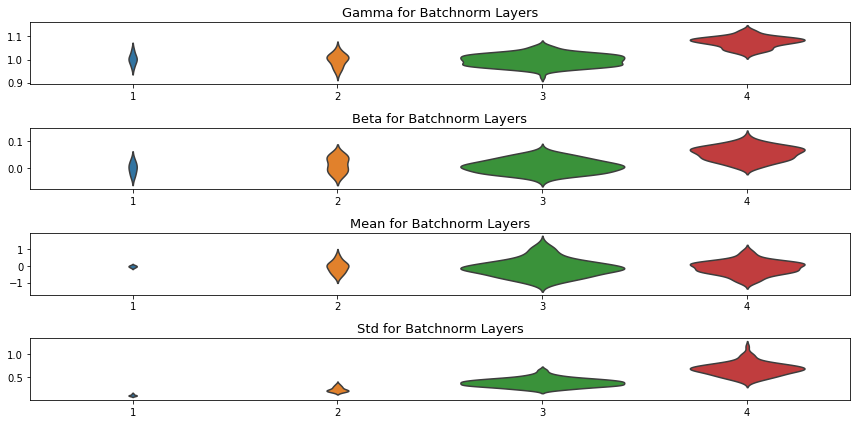

In [87]:
fig = plt.figure(figsize=(12, 6))
axes = grid_axes_it(4, 1, fig=fig)
ax = next(axes)
# ddf = df[df['Standard Deviation'] == sig]
sns.violinplot(x='x', y='gamma', data=gamma, ax=ax, scale='count', inner=None)

# sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Gamma for Batchnorm Layers', fontsize=13)


ax = next(axes)
# ddf = df[df['Standard Deviation'] == sig]
sns.violinplot(x='x', y='beta', data=beta, ax=ax, scale='count', inner=None)

# sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Beta for Batchnorm Layers', fontsize=13)



ax = next(axes)
# ddf = df[df['Standard Deviation'] == sig]
sns.violinplot(x='x', y='mean', data=mean, ax=ax, scale='count', inner=None)

# sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Mean for Batchnorm Layers', fontsize=13)





ax = next(axes)
# ddf = df[df['Standard Deviation'] == sig]
sns.violinplot(x='x', y='std', data=std, ax=ax, scale='count', inner=None)

# sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Std for Batchnorm Layers', fontsize=13)





plt.tight_layout()
plt.show()

In [369]:
# 3.3
def net():
    return tf.keras.models.Sequential([
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Conv2D(filters=6, kernel_size=5,input_shape=(28, 28, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=16, kernel_size=5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.Dense(84),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.Dense(10, activation = 'softmax'),])

In [370]:
model = net()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,128,5,validation_split=0.1)

Epoch 1/5
422/422 [==============================] - 36s 82ms/step - loss: 0.5366 - accuracy: 0.9100 - val_loss: 1.1415 - val_accuracy: 0.6973
Epoch 2/5
422/422 [==============================] - 34s 82ms/step - loss: 0.1342 - accuracy: 0.9736 - val_loss: 0.2600 - val_accuracy: 0.9245
Epoch 3/5
422/422 [==============================] - 34s 81ms/step - loss: 0.0865 - accuracy: 0.9792 - val_loss: 0.1320 - val_accuracy: 0.9598
Epoch 4/5
422/422 [==============================] - 34s 82ms/step - loss: 0.0669 - accuracy: 0.9824 - val_loss: 0.0691 - val_accuracy: 0.9823
Epoch 5/5
422/422 [==============================] - 34s 82ms/step - loss: 0.0561 - accuracy: 0.9847 - val_loss: 0.0682 - val_accuracy: 0.9808


In [371]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0780 - accuracy: 0.9772


[0.07803839445114136, 0.9771999716758728]

In [346]:
#Order of parameters of BatchNorm gamma, beta, running mean, std
batchnorm1 = []
i=0
for l in (model.layers):
    if('batch_normalization' in str(l)):
        i+=1
        batchnorm1.append(l.get_weights())
        print('The learned batch norm parameters of BatchNorm layer {} are {}'.format(i,l.get_weights()))
print(len(batchnorm1))

The learned batch norm parameters of BatchNorm layer 1 are [array([0.935769], dtype=float32), array([0.03544567], dtype=float32), array([0.13047461], dtype=float32), array([0.09480096], dtype=float32)]
The learned batch norm parameters of BatchNorm layer 2 are [array([0.92459416, 0.969346  , 1.0635519 , 1.0852412 , 0.9425522 ,
       1.079936  ], dtype=float32), array([-0.01662977, -0.06533749, -0.07964704,  0.0227954 ,  0.05569836,
       -0.0122155 ], dtype=float32), array([-0.01847833, -0.00050582, -0.01334626, -0.28055096, -0.07656857,
       -0.06905887], dtype=float32), array([0.36971968, 0.49936122, 0.2524704 , 1.6194601 , 0.08810559,
       0.47783393], dtype=float32)]
The learned batch norm parameters of BatchNorm layer 3 are [array([1.013412  , 0.93622553, 1.0098742 , 1.072019  , 0.98053354,
       0.95102227, 0.9669562 , 0.9900335 , 0.96503115, 0.9981381 ,
       1.130085  , 0.9165584 , 0.9828812 , 1.0323027 , 0.99074376,
       0.9763477 ], dtype=float32), array([-0.0166647

In [349]:
d1 = {'x':[],'gamma':[]}#,'beta':[],'mean':[],'std':[]}
d2 = {'x':[],'beta':[]}
d3 = {'x':[],'mean':[]}
d4 = {'x':[],'std':[]}
lab = {'0':'gamma','1':'beta','2':'mean','3':'std'}
for k in range(len(batchnorm1)):
    # for i in range(len(batchnorm1[k])):
    # print(i,len(batchnorm1[k][0]))
    for j in range(len(batchnorm1[k][0])):
        d1['x'].append(k+1)
        d1[lab[str(0)]].append(batchnorm1[k][0][j])
    for j in range(len(batchnorm1[k][1])):
        d2['x'].append(k+1)
        d2[lab[str(1)]].append(batchnorm1[k][1][j])
    for j in range(len(batchnorm1[k][2])):
        d3['x'].append(k+1)
        d3[lab[str(2)]].append(batchnorm1[k][2][j])
    for j in range(len(batchnorm1[k][3])):
        d4['x'].append(k+1)
        d4[lab[str(3)]].append(batchnorm1[k][3][j])
     
gamma = pd.DataFrame(data=d1)
beta = pd.DataFrame(data=d2)
mean = pd.DataFrame(data=d3)
std = pd.DataFrame(data=d4)

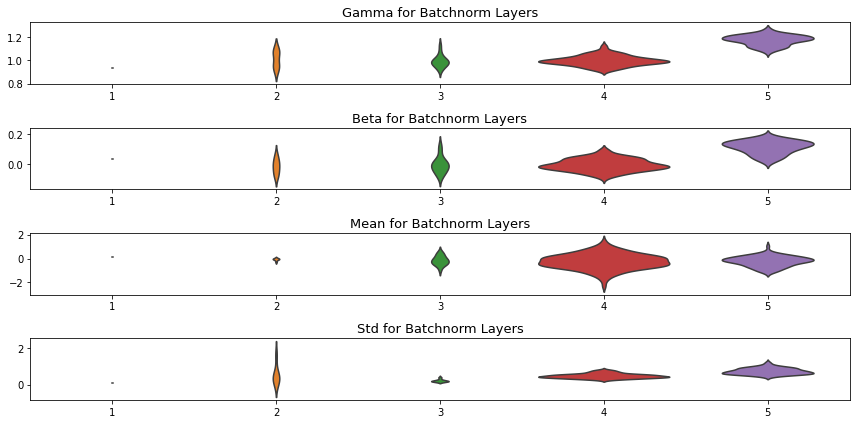

In [350]:
fig = plt.figure(figsize=(12, 6))
axes = grid_axes_it(4, 1, fig=fig)
ax = next(axes)
# ddf = df[df['Standard Deviation'] == sig]
sns.violinplot(x='x', y='gamma', data=gamma, ax=ax, scale='count', inner=None)

# sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Gamma for Batchnorm Layers', fontsize=13)


ax = next(axes)
# ddf = df[df['Standard Deviation'] == sig]
sns.violinplot(x='x', y='beta', data=beta, ax=ax, scale='count', inner=None)

# sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Beta for Batchnorm Layers', fontsize=13)



ax = next(axes)
# ddf = df[df['Standard Deviation'] == sig]
sns.violinplot(x='x', y='mean', data=mean, ax=ax, scale='count', inner=None)

# sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Mean for Batchnorm Layers', fontsize=13)





ax = next(axes)
# ddf = df[df['Standard Deviation'] == sig]
sns.violinplot(x='x', y='std', data=std, ax=ax, scale='count', inner=None)

# sns.violinplot(x='Hidden Layer', y='Output', data=ddf, ax=ax, scale='count', inner=None)

ax.set_xlabel('')
ax.set_ylabel('')

ax.set_title('Std for Batchnorm Layers', fontsize=13)





plt.tight_layout()
plt.show()

As we can observe using Batch Normalization instead of Standard Normalization has increased the test accuracy. \\
Standard Norm - train loss: 0.0566, train accuracy: 0.9839; test loss: 0.1521, test accuracy: 0.9511 \\
Batch Normalization - train loss: 0.0561, train accuracy: 0.9847; test loss: 0.0780, test accuracy: 0.9772 \\
The train loss and accuracy is almost the same for both the models. Batch norm model's loss has very slightly higher train accuracy and lower train loss. \\
The test accuracy of te Batch norm model is higher than that of the standard norm model. The test loss of tje Batchh norm model is lower than that of the standard norm model. \\
Yes the batch normalization for the input layer has slightly improved the performance on the test set. 

In [89]:
# Dropout

def net():
    return tf.keras.models.Sequential([
        tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None),
        tf.keras.layers.Conv2D(filters=6, kernel_size=5,input_shape=(28, 28, 1)),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=16, kernel_size=5),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None),
        tf.keras.layers.Dense(84),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None),
        tf.keras.layers.Dense(10, activation = 'softmax'),])

In [90]:
model = net()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,128,15,validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 22s 49ms/step - loss: 2.3300 - accuracy: 0.1034 - val_loss: 2.3018 - val_accuracy: 0.1050
Epoch 2/15
422/422 [==============================] - 21s 49ms/step - loss: 2.3028 - accuracy: 0.1071 - val_loss: 2.3019 - val_accuracy: 0.1050
Epoch 3/15
422/422 [==============================] - 20s 48ms/step - loss: 2.3020 - accuracy: 0.1125 - val_loss: 2.3020 - val_accuracy: 0.1050
Epoch 4/15
422/422 [==============================] - 20s 49ms/step - loss: 2.3013 - accuracy: 0.1129 - val_loss: 2.3013 - val_accuracy: 0.1050
Epoch 5/15
422/422 [==============================] - 21s 49ms/step - loss: 1.6285 - accuracy: 0.4072 - val_loss: 0.4646 - val_accuracy: 0.8658
Epoch 6/15
422/422 [==============================] - 21s 49ms/step - loss: 0.6692 - accuracy: 0.7841 - val_loss: 0.2809 - val_accuracy: 0.9220
Epoch 7/15
422/422 [==============================] - 21s 50ms/step - loss: 0.5391 - accuracy: 0.8336 - val_loss: 0.2260 - val_accuracy:

In [91]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1255 - accuracy: 0.9601


[0.12549354135990143, 0.960099995136261]

The test accuracy of Batch norm model = 0.9772 \\
The test accuracy of Standard norm model = 0.9511 \\
The test accuracy of Dropout model = 0.9601 \\
Therefore the test accuracy of batch norm is greater. And the test accuracy of Standard norm model is the least.

In [92]:
# Dropout + normalization

def net():
    return tf.keras.models.Sequential([
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.2, noise_shape=None, seed=None),
        tf.keras.layers.Conv2D(filters=6, kernel_size=5,input_shape=(28, 28, 1)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=16, kernel_size=5),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None),
        tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(120),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None),
        tf.keras.layers.Dense(84),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.Dropout(0.5, noise_shape=None, seed=None),
        tf.keras.layers.Dense(10, activation = 'softmax'),])

In [93]:
model = net()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,128,15,validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 37s 84ms/step - loss: 1.7867 - accuracy: 0.3861 - val_loss: 0.7698 - val_accuracy: 0.8473
Epoch 2/15
422/422 [==============================] - 35s 83ms/step - loss: 1.0900 - accuracy: 0.6402 - val_loss: 0.4531 - val_accuracy: 0.8973
Epoch 3/15
422/422 [==============================] - 35s 82ms/step - loss: 0.8197 - accuracy: 0.7383 - val_loss: 0.2889 - val_accuracy: 0.9327
Epoch 4/15
422/422 [==============================] - 35s 82ms/step - loss: 0.6366 - accuracy: 0.8014 - val_loss: 0.2146 - val_accuracy: 0.9437
Epoch 5/15
422/422 [==============================] - 35s 83ms/step - loss: 0.5101 - accuracy: 0.8440 - val_loss: 0.1392 - val_accuracy: 0.9630
Epoch 6/15
422/422 [==============================] - 35s 83ms/step - loss: 0.4327 - accuracy: 0.8706 - val_loss: 0.1141 - val_accuracy: 0.9673
Epoch 7/15
422/422 [==============================] - 35s 83ms/step - loss: 0.3844 - accuracy: 0.8842 - val_loss: 0.0934 - val_accuracy:

In [94]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0626 - accuracy: 0.9795


[0.06260231882333755, 0.9794999957084656]

The test accuracy using both = 0.9795 \\
This is greater than the test accuracy achieved using Dropout alone or Batch normalization alone.

Problem 4

In [102]:
import time
import torch
import matplotlib.pyplot as plt
from time import time
from torch import nn, optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import time

In [96]:
def f(x1,x2):
    a=np.sqrt(np.fabs(x2+x1/2+47))
    b=np.sqrt(np.fabs(x1-(x2+47)))
    c=-(x2+47)*np.sin(a)-x1*np.sin(b)
    return c

In [97]:
def count_parameters(model): 
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
# count_parameters(model3)

In [98]:
def train(model,dataloader,epochs):
    for ep in range(epochs):
        ep_loss = 0
        for x_b,y_b in dataloader:
            optimizer.zero_grad()
            # Forward pass
            y_pred = model(x_b)
            # Compute Loss
            # print(y_pred,y_train)
            loss = criterion(y_pred.squeeze(), y_b)
            # loss = torch.sqrt(loss)
            ep_loss += loss/BATCH_SIZE
            # Backward pass
            loss.backward()
            optimizer.step()
        # print('Epoch {}: train loss: {}'.format(ep, ep_loss))
        # print(epoch)
def test(model,x_test,y_test):
    loss=0
    y_pred = model((x_test))
    loss = criterion(y_pred.squeeze(),y_test)
    return (torch.sqrt(loss))

In [133]:
n = 100000
x1 = np.random.uniform(-512,512,n)
x2 = np.random.uniform(-512,512,n)
x = torch.FloatTensor([([x1[i],x2[i]]) for i in range(n)])
# print(x)
y = torch.FloatTensor(f(x1,x2) + np.random.normal(0,np.sqrt(0.3),n))
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
dataset = TensorDataset(x_train, y_train)
BATCH_SIZE=1000
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

In [64]:
class Feedforward_1layer(torch.nn.Module):
        def __init__(self, input_size, hidden_size):
            super(Feedforward_1layer, self).__init__()
            self.input_size = input_size
            self.hidden_size  = hidden_size
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
            self.relu = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size, 1)
            self.sigmoid = torch.nn.Sigmoid()
        def forward(self, x):
            hidden = self.fc1(x)
            relu = self.relu(hidden)
            output = self.fc2(relu)
            return output

In [65]:
class Feedforward_2layer(torch.nn.Module):
        def __init__(self, input_size, hidden_size1, hidden_size2):
            super(Feedforward_2layer, self).__init__()
            self.input_size = input_size
            self.hidden_size1  = hidden_size1
            self.hidden_size2  = hidden_size2 
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size1)
            self.relu = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size1, self.hidden_size2)
            self.fc3 = torch.nn.Linear(self.hidden_size2, 1)
            self.sigmoid = torch.nn.Sigmoid()
            self.batch_normalization1 = torch.nn.BatchNorm1d(self.hidden_size1)
            self.batch_normalization2 = torch.nn.BatchNorm1d(self.hidden_size2)

        def forward(self, x):
            hidden1 = self.fc1(x)
            hidden1 = self.batch_normalization1(hidden1)
            relu = self.relu(hidden1)
            hidden2 = self.fc2(relu)
            hidden2 = self.batch_normalization2(hidden2)
            relu = self.relu(hidden2)
            output = self.fc3(relu)
            return output

In [66]:
class Feedforward_3layer(torch.nn.Module):
        def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3):
            super(Feedforward_3layer, self).__init__()
            self.input_size = input_size
            self.hidden_size1  = hidden_size1
            self.hidden_size2  = hidden_size2
            self.hidden_size3  = hidden_size3             
            self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size1)
            self.relu = torch.nn.ReLU()
            self.fc2 = torch.nn.Linear(self.hidden_size1, self.hidden_size2)
            self.fc3 = torch.nn.Linear(self.hidden_size2, self.hidden_size3)
            self.fc4 = torch.nn.Linear(self.hidden_size3, 1)
            self.sigmoid = torch.nn.Sigmoid()
            self.batch_normalization1 = torch.nn.BatchNorm1d(self.hidden_size1)
            self.batch_normalization2 = torch.nn.BatchNorm1d(self.hidden_size2)
            self.batch_normalization3 = torch.nn.BatchNorm1d(self.hidden_size3)

        def forward(self, x):
            hidden1 = self.fc1(x)
            hidden1 = self.batch_normalization1(hidden1)
            relu = self.relu(hidden1)
            hidden2 = self.fc2(relu)
            hidden2 = self.batch_normalization2(hidden2)
            relu = self.relu(hidden2)
            hidden3 = self.fc3(relu)
            hidden3 = self.batch_normalization3(hidden3)
            relu = self.relu(hidden3)
            output = self.fc4(relu)
            return output

In [103]:

criterion = torch.nn.MSELoss()


In [12]:
hiddensize_1 = [64,128,256,512]
no_params_1 = []
loss_1 = []
time_1 = []
for h in hiddensize_1:
    model = Feedforward_1layer(2,h)
    optimizer = torch.optim.SGD(model.parameters(),lr=1e-7,momentum=0.9,dampening=0,nesterov=True)
    start = time.time()
    train(model,dataloader,50)
    end = time.time()
    time_1.append(end-start)
    no_params_1.append(count_parameters(model))
    loss_1.append(test(model,x_test,y_test))

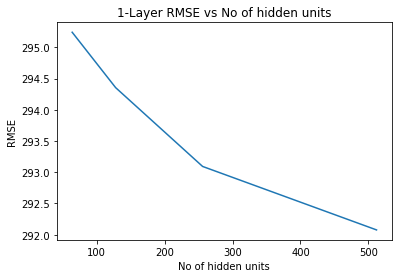

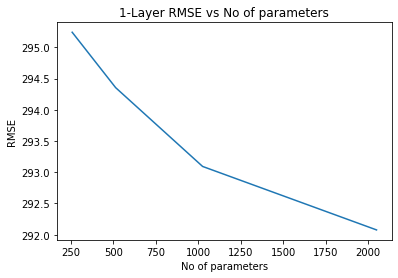

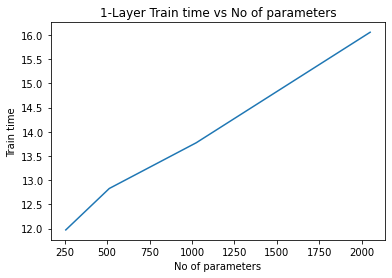

In [34]:
plt.plot(hiddensize_1,loss_1)
plt.title('1-Layer RMSE vs No of hidden units')
plt.xlabel('No of hidden units')
plt.ylabel('RMSE')
plt.show()
plt.plot(no_params_1,loss_1)
plt.title('1-Layer RMSE vs No of parameters')
plt.xlabel('No of parameters')
plt.ylabel('RMSE')
plt.show()
plt.plot(no_params_1,time_1)
plt.title('1-Layer Train time vs No of parameters')
plt.xlabel('No of parameters')
plt.ylabel('Train time')
plt.show()

In [107]:
hiddensize_2 = [[16,16],[32,32],[64,64],[128,128],[256,256]]
no_params_2 = []
loss_2 = []
time_2 = []
for h in hiddensize_2:
    model = Feedforward_2layer(2,h[0],h[1])
    optimizer = torch.optim.SGD(model.parameters(),lr=1e-4,momentum=0.9,dampening=0,nesterov=True)
    start = time.time()
    train(model,dataloader,20)
    end = time.time()
    time_2.append(end-start)
    no_params_2.append(count_parameters(model))
    loss_2.append(test(model,x_test,y_test))

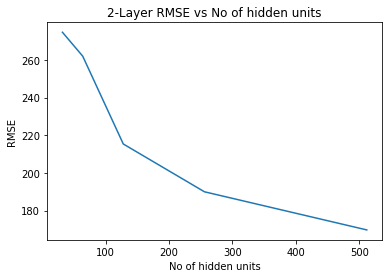

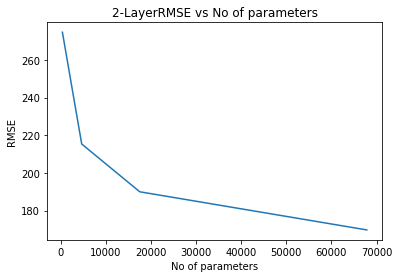

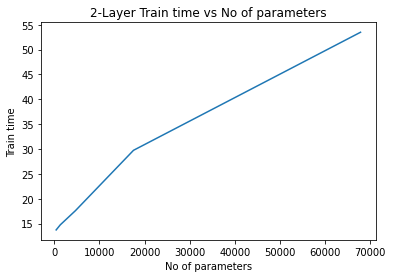

In [108]:
plt.plot([sum(hiddensize_2[i]) for i in range(len(hiddensize_2))],loss_2)
plt.title('2-Layer RMSE vs No of hidden units')
plt.xlabel('No of hidden units')
plt.ylabel('RMSE')
plt.show()
plt.plot(no_params_2,loss_2)
plt.title('2-LayerRMSE vs No of parameters')
plt.xlabel('No of parameters')
plt.ylabel('RMSE')
plt.show()
plt.plot(no_params_2,time_2)
plt.title('2-Layer Train time vs No of parameters')
plt.xlabel('No of parameters')
plt.ylabel('Train time')
plt.show()

In [140]:
hiddensize_3 = [[16,16,16],[32,32,16],[64,32,64],[64,128,64],[128,256,128]]
no_params_3 = []
loss_3 = []
time_3 = []
for h in hiddensize_3:
    model = Feedforward_3layer(2,h[0],h[1],h[2])
    optimizer = torch.optim.SGD(model.parameters(),lr=1e-4,momentum=0.9,dampening=0,nesterov=True)
    start = time.time()
    train(model,dataloader,20)
    end = time.time()
    time_3.append(end-start)
    no_params_3.append(count_parameters(model))
    loss_3.append(test(model,x_test,y_test))

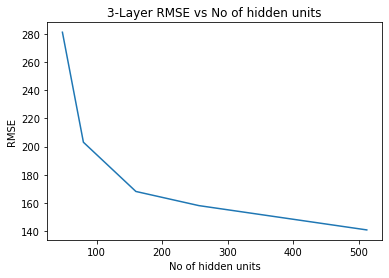

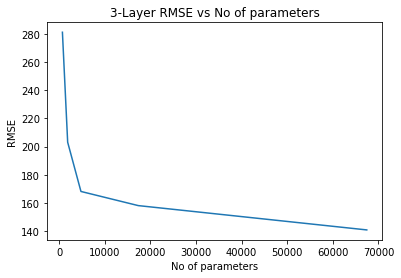

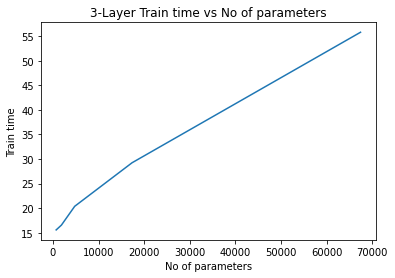

In [141]:
plt.plot([sum(hiddensize_3[i]) for i in range(len(hiddensize_3))],loss_3)
plt.title('3-Layer RMSE vs No of hidden units')
plt.xlabel('No of hidden units')
plt.ylabel('RMSE')
plt.show()
plt.plot(no_params_3,loss_3)
plt.title('3-Layer RMSE vs No of parameters')
plt.xlabel('No of parameters')
plt.ylabel('RMSE')
plt.show()
plt.plot(no_params_3,time_3)
plt.title('3-Layer Train time vs No of parameters')
plt.xlabel('No of parameters')
plt.ylabel('Train time')
plt.show()

As we go from deeper to shallow networks as the number of parameters increase , the amount of decrease in the RMSE is lesser. This can be clearly observed in the graph below. With a small increase in the number of parameters in the 3 layer model there is high decrease in the RMSE when compared to that of 2 layer and 1 layer models. And comparitively 2 layer model has a higher decrease in RMSE wen compared to 1 layer model. \\
The training time increases as the number of layers increases. We can observe that the slope of the 1 layer model is very high when compared to 2 and 3 layer models. But the training time is higher for 2 layer model when compared to 1 layer model. And the train time of the 2 layer model is very close but slightly lesser than that of the 3 layer model.

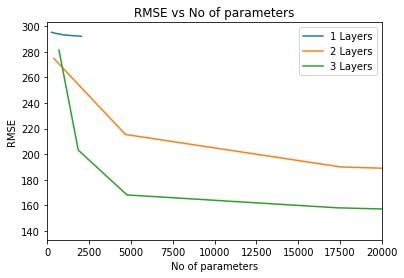

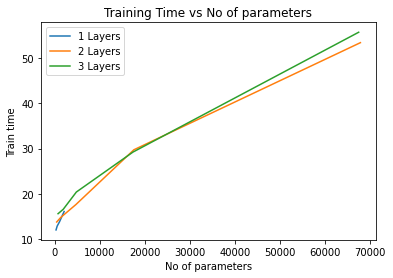

In [145]:
plt.plot(no_params_1,loss_1,label='1 Layers')
plt.plot(no_params_2,loss_2,label='2 Layers')
plt.plot(no_params_3,loss_3,label='3 Layers')
plt.title('RMSE vs No of parameters')
plt.xlabel('No of parameters')
plt.ylabel('RMSE')
plt.xlim(0,20000)
plt.legend()
plt.show()

plt.plot(no_params_1,time_1,label='1 Layers')
plt.plot(no_params_2,time_2,label='2 Layers')
plt.plot(no_params_3,time_3,label='3 Layers')
plt.title('Training Time vs No of parameters')
plt.xlabel('No of parameters')
plt.ylabel('Train time')
# plt.xlim(0,10000)
plt.legend()
plt.show()